In [5]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
time1 = time.time()
print(time1)
batch_size = [36]
device = 8
model_name_list = ["untran-densenet121"]

1591153377.5984776


In [2]:
model1 = models.densenet121(pretrained = False)
model1

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [3]:
model1.classifier = nn.Linear(1024,6)

In [4]:
model1

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

untran-densenet121
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.3138, Accuracy: 47.6244%,Valid: Loss: 1.4243, Accuracy: 47.5610%,Time: 21.6124s
Epoch: 2
Epoch: 002, Training: Loss: 1.6807, Accuracy: 33.3710%,Valid: Loss: 1.5160, Accuracy: 36.8902%,Time: 19.5287s
Epoch: 3
Epoch: 003, Training: Loss: 1.4017, Accuracy: 42.7602%,Valid: Loss: 1.4201, Accuracy: 42.6829%,Time: 19.5801s
Epoch: 4
Epoch: 004, Training: Loss: 1.3287, Accuracy: 47.0023%,Valid: Loss: 1.3404, Accuracy: 46.0366%,Time: 19.6085s
Epoch: 5
Epoch: 005, Training: Loss: 1.2546, Accuracy: 50.5656%,Valid: Loss: 1.4495, Accuracy: 43.2927%,Time: 19.6075s
Epoch: 6
Epoch: 006, Training: Loss: 1.1984, Accuracy: 52.8846%,Valid: Loss: 1.2796, Accuracy: 51.2195%,Time: 18.9749s
Epoch: 7
Epoch: 007, Training: Loss: 1.1807, Accuracy: 52.8281%,Valid: Loss: 1.3212, Accuracy: 49.3902%,Time: 19.0876s
Epoch: 8
Epoch: 008, Training: Loss: 1.1491, Accuracy: 56.8439%,Valid: Loss: 1.4262, Accuracy: 49.6951%,Time: 19.0330s
Epoch: 9
Epoch: 009,

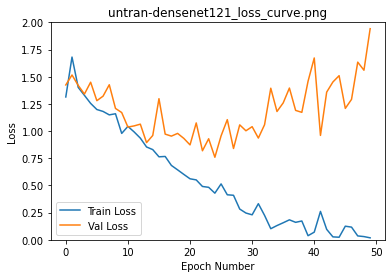

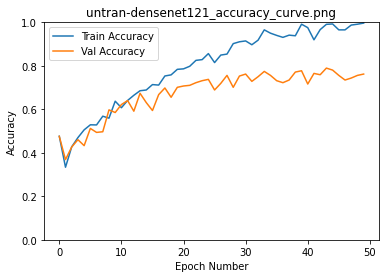

RuntimeError: CUDA error: out of memory

In [6]:
model_list = [model1]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
for size in batch_size:
    i = 0
    for models in model_list:
        file_name = model_name_list[i]
        print(file_name)
        optimizer = optim.Adam(models.parameters())
        trainmodel(model_name=models,loss = lossfunc,batchsize=size,opti=optimizer,\
                   epoch_num=50,device_num=device,filename=file_name)
        i+=1